In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [88]:
data=pd.read_csv("./dataset.csv")

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [90]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [91]:
data_clean = data.drop_duplicates(subset="track_id", keep='first', inplace=False)

In [92]:
data_drop = data_clean.drop(['track_id', 'Unnamed: 0','time_signature', 'key', 'mode'], axis=1)

data_drop.head(10)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,acoustic
5,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,-8.807,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,acoustic
6,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,-8.822,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,acoustic
7,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,-9.331,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,acoustic
8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,-8.700,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,acoustic
9,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,-6.770,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,acoustic


In [93]:
data_p = data_drop.sort_values("popularity", ascending=False)

data_p.head(10)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,-7.375,0.0864,0.01300,0.000005,0.2660,0.238,131.121,dance
51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,-5.548,0.0440,0.01250,0.033000,0.2300,0.550,128.033,hip-hop
67356,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,-5.329,0.0364,0.58300,0.000002,0.2180,0.850,124.980,latin
20008,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,-3.673,0.0343,0.00383,0.000007,0.3710,0.304,128.040,dance
67358,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,-5.105,0.0817,0.09010,0.000027,0.0933,0.425,92.005,latin
67359,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,-5.198,0.2530,0.09930,0.000291,0.1260,0.187,106.672,latin
67559,Bad Bunny,Un Verano Sin Ti,Efecto,96,213061,False,0.801,0.475,-8.797,0.0516,0.14100,0.000017,0.0639,0.234,98.047,latin
79000,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,148485,False,0.704,0.797,-5.927,0.0475,0.08260,0.000745,0.0546,0.825,139.994,piano
20000,Chris Brown,Indigo (Extended),Under The Influence,96,184613,True,0.733,0.690,-5.529,0.0427,0.06350,0.000001,0.1050,0.310,116.992,dance
67500,Bad Bunny;Bomba Estéreo,Un Verano Sin Ti,Ojitos Lindos,95,258298,False,0.647,0.686,-5.745,0.0413,0.08000,0.000001,0.5280,0.268,79.928,latin


In [94]:
#Parametry statystytczne: średnia, mediana, odchylenie...
#Shape of the dataset
rows, columns = data_p.shape
size = data_p.size
print(f'Dataset shape is {rows} rows x {columns} columns - {size} elements in total')

Dataset shape is 89741 rows x 16 columns - 1435856 elements in total


In [95]:
df = pd.DataFrame(data_p)

# Obliczanie statystyk
statistics = df[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].describe()

statistics

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,89741.000000,8.974100e+04,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000
mean,33.198438,2.291418e+05,0.562166,0.634458,-8.499004,0.087442,0.328289,0.173413,0.216970,0.469477,122.058316
std,20.580824,1.129477e+05,0.176691,0.256605,5.221490,0.113277,0.338321,0.323848,0.194884,0.262864,30.117532
min,0.000000,0.000000e+00,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.730400e+05,0.450000,0.457000,-10.322000,0.036000,0.017100,0.000000,0.098200,0.249000,99.264000
50%,33.000000,2.132930e+05,0.576000,0.676000,-7.185000,0.048900,0.188000,0.000058,0.132000,0.457000,122.013000
75%,49.000000,2.642930e+05,0.692000,0.853000,-5.108000,0.085900,0.625000,0.097600,0.279000,0.682000,140.077000
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


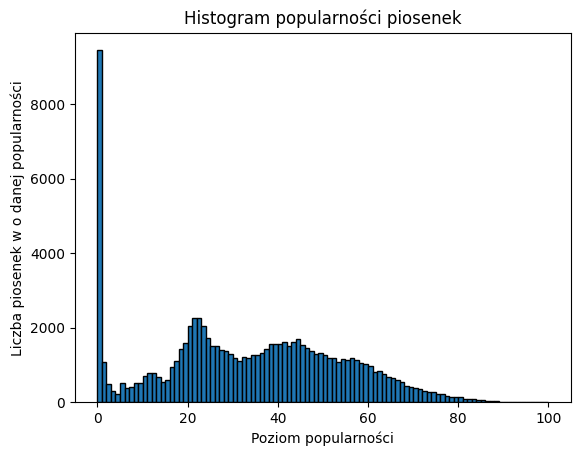

In [96]:

df = pd.DataFrame(data_p)
column_to_analyze = df['popularity']

plt.hist(column_to_analyze, bins=100, edgecolor='black')
plt.xlabel('Poziom popularności')
plt.ylabel('Liczba piosenek w o danej popularności')
plt.title('Histogram popularności piosenek')
plt.show()



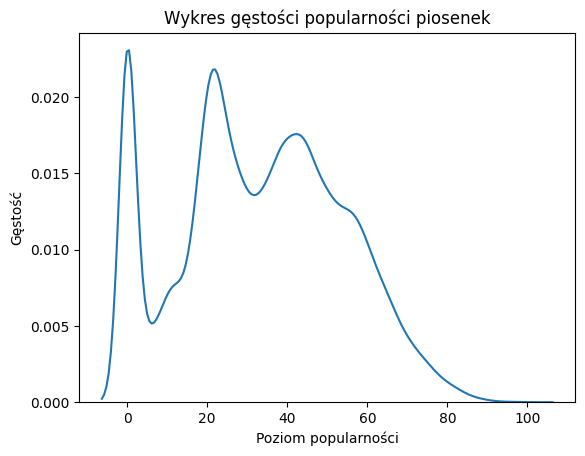

Skośność: 0.07086752749147761
Kurtoza: -0.7706698513785089


In [97]:
#Analiza rozkładu danych: histogram, wykresy gęstości, skośność i kurtoza


df = pd.DataFrame(data_p)
column_to_analyze = df['popularity']

sns.kdeplot(column_to_analyze)
plt.xlabel('Poziom popularności')
plt.ylabel('Gęstość')
plt.title('Wykres gęstości popularności piosenek')
plt.show()

skewness = column_to_analyze.skew()
print("Skośność:", skewness)
kurtosis = column_to_analyze.kurtosis()
print("Kurtoza:", kurtosis)



                   artists  album_name  track_name  popularity  duration_ms   
artists           1.000000    0.096057    0.044065   -0.000779    -0.018576  \
album_name        0.096057    1.000000    0.315439    0.029029     0.008431   
track_name        0.044065    0.315439    1.000000    0.007056     0.005631   
popularity       -0.000779    0.029029    0.007056    1.000000    -0.023119   
duration_ms      -0.018576    0.008431    0.005631   -0.023119     1.000000   
explicit         -0.002279   -0.002677   -0.011364    0.054902    -0.065365   
danceability     -0.002807   -0.021692   -0.022094    0.064281    -0.064130   
energy           -0.006753   -0.040432   -0.039561    0.013728     0.063261   
loudness         -0.016783   -0.027414   -0.009177    0.071676     0.000364   
speechiness      -0.017311   -0.016418   -0.029571   -0.047081    -0.060744   
acousticness      0.000392    0.029620    0.033441   -0.038847    -0.108499   
instrumentalness  0.015256   -0.004646   -0.028703  

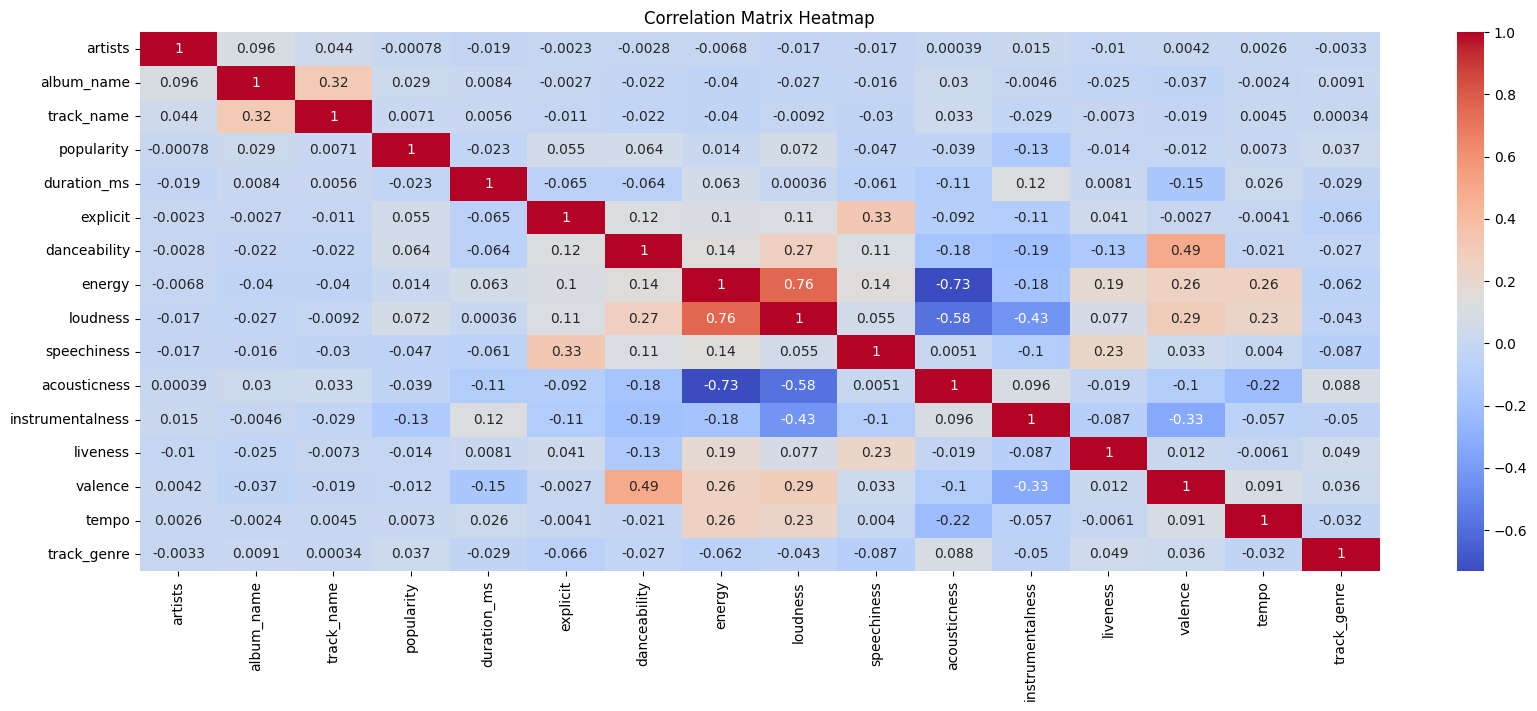

In [98]:
#Macierz korelacji:

#Obliczenie macierzy korelacji między zmiennymi
df = pd.DataFrame(data_p)

df['artists'] = df['artists'].astype('category').cat.codes
df['album_name'] = df['album_name'].astype('category').cat.codes
df['track_name'] = df['track_name'].astype('category').cat.codes
df['track_genre'] = df['track_genre'].astype('category').cat.codes

correlation_matrix = df.corr()

print(correlation_matrix)
#Wygenerowanie wykresu korelacji (np. heatmapy)

plt.figure(figsize=(20, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix Heatmap')
plt.show()


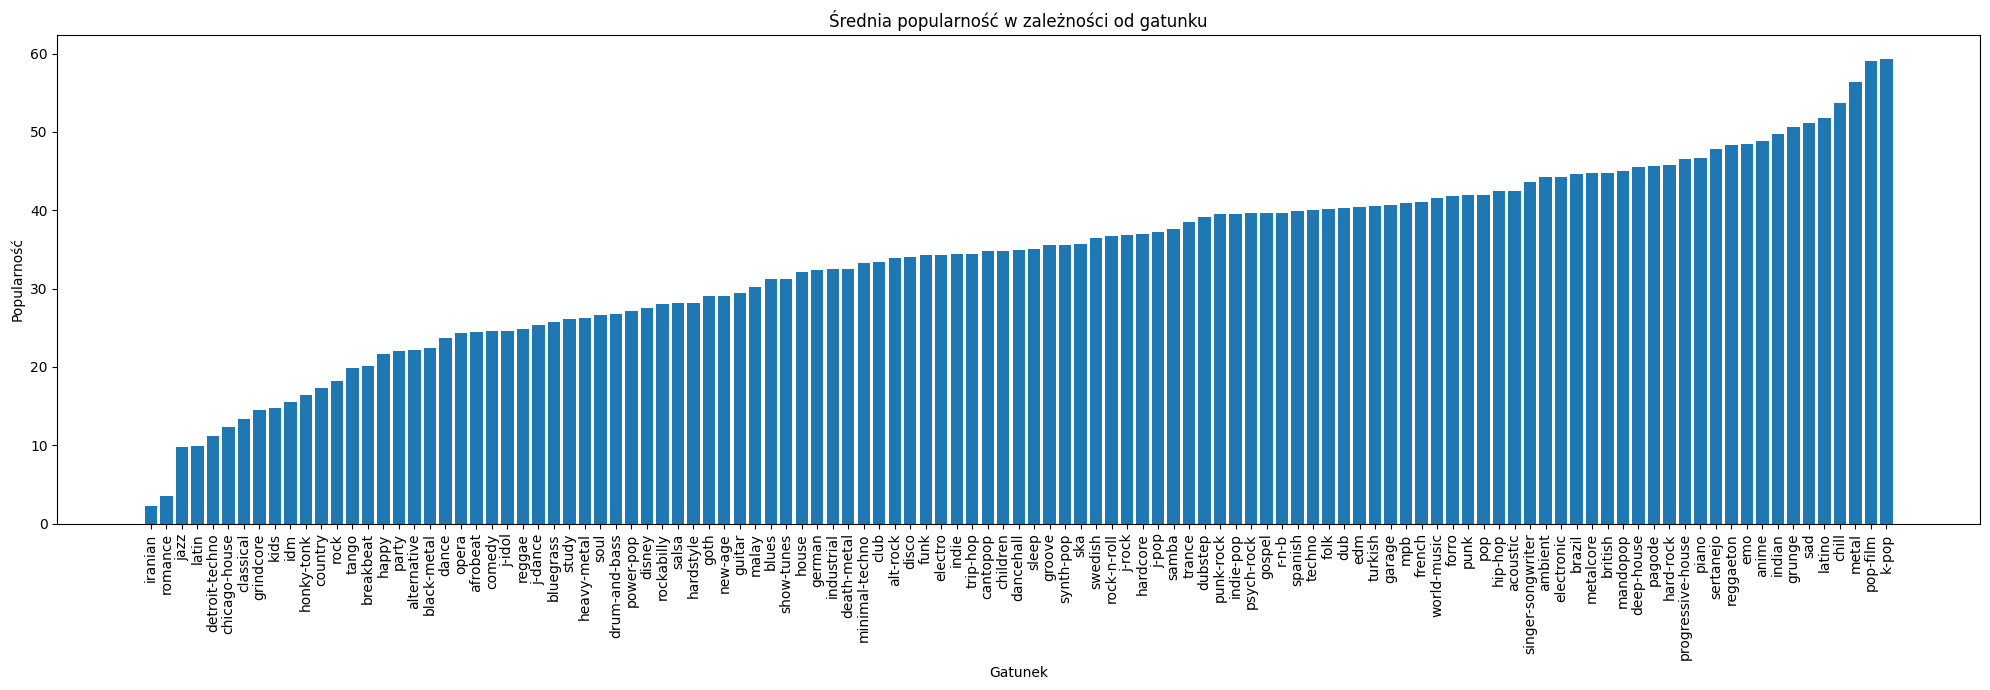

In [99]:
#Wykres popularności względem gatunku

df = pd.DataFrame(data_p)

# Grupowanie danych po gatunku i obliczanie średniej popularności
genre_popularity = df.groupby('track_genre')['popularity'].mean()

# Sortowanie danych popularności
sorted_genre_popularity = genre_popularity.sort_values()

# Tworzenie wykresu
plt.figure(figsize=(20, 7))
plt.bar(sorted_genre_popularity.index, sorted_genre_popularity.values)
plt.xlabel('Gatunek')
plt.ylabel('Popularność')
plt.title('Średnia popularność w zależności od gatunku')
plt.xticks(rotation=90)
plt.tight_layout()

# Wyświetlanie wykresu
plt.show()

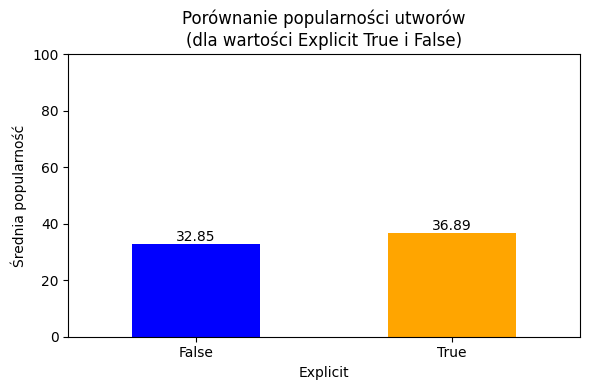

In [100]:
#W zależności od wartości explicit
df = pd.DataFrame(data_p)

# Grupowanie danych po wartości explicit i obliczanie średniej popularności
explicit_popularity = df.groupby('explicit')['popularity'].mean()

# Tworzenie wykresu
plt.figure(figsize=(6, 4))
colors = ['blue', 'orange']  # Kolory dla False i True
explicit_popularity.plot(kind='bar', color=colors)
plt.xlabel('Explicit')
plt.ylabel('Średnia popularność')
plt.title('Porównanie popularności utworów\n(dla wartości Explicit True i False)')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.ylim(0, 100)  # Ustalenie zakresu osi Y
plt.tight_layout()

# Dodanie etykiet do słupków
for i, value in enumerate(explicit_popularity):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Wyświetlanie wykresu
plt.show()

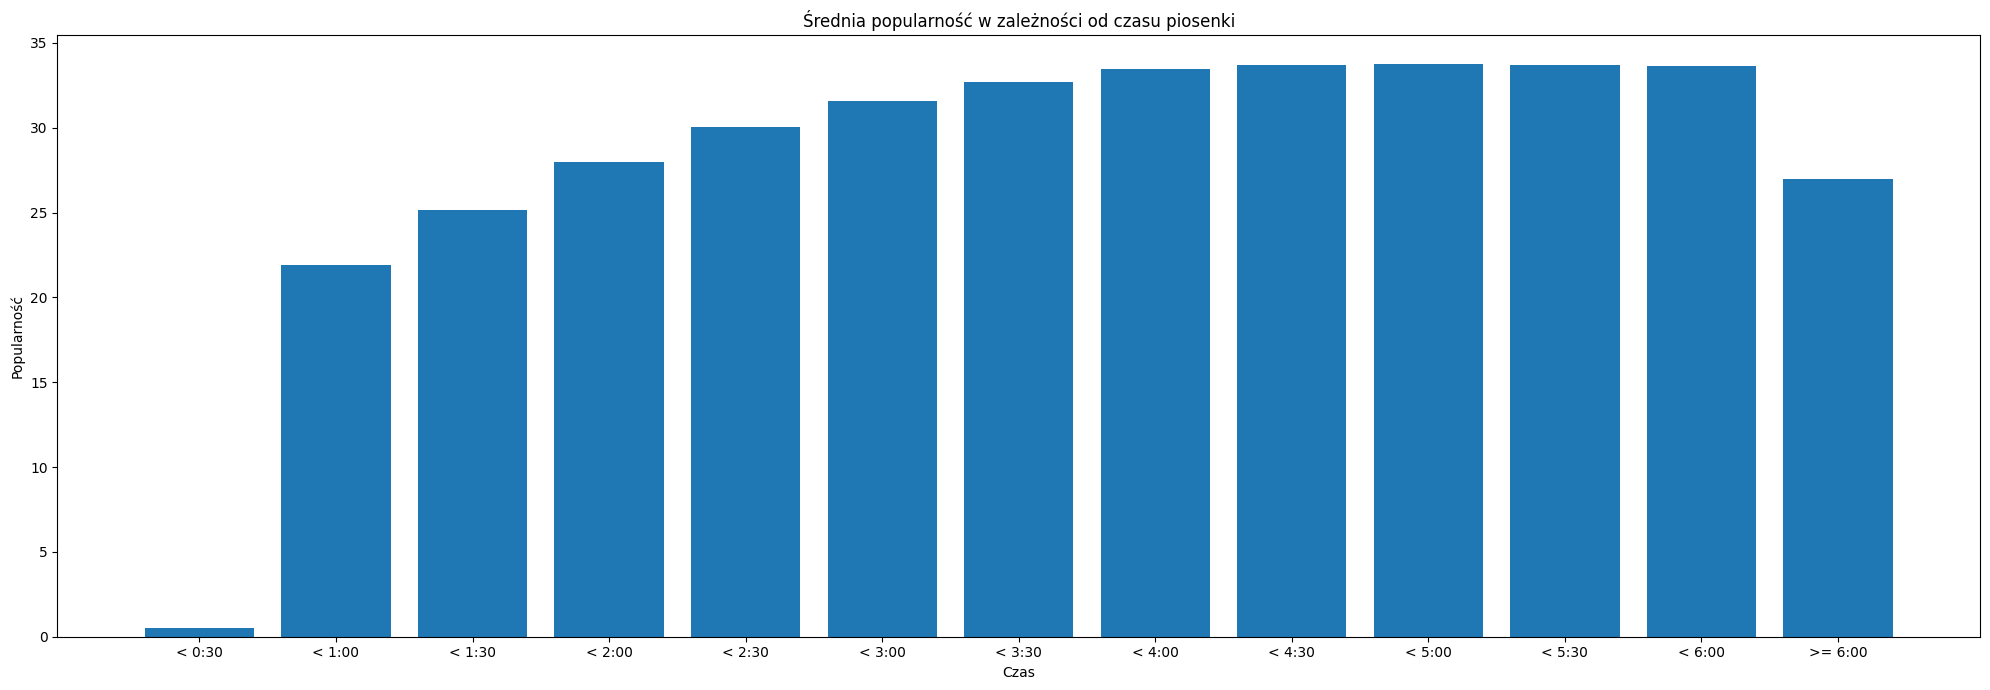

In [101]:
def get_average(sign, shorter_than_minutes):
    longer_than = (shorter_than_minutes * 1000 * 30)
    song_range = data_p.query(f'duration_ms {sign} {longer_than}')
    average = song_range['popularity'].mean()
    return average

popularity_per_length = []

for i in range(1, 13):
    popularity_per_length.append(get_average('<', i))
popularity_per_length.append(get_average('>', 14))

plt.figure(figsize=(20, 7))
length_bar = ['< 0:30', '< 1:00', '< 1:30', '< 2:00', '< 2:30', '< 3:00', '< 3:30', '< 4:00', '< 4:30', '< 5:00', '< 5:30', '< 6:00', '>= 6:00']  # Aktualizacja etykiet
plt.bar(length_bar, popularity_per_length)
plt.xlabel('Czas')
plt.ylabel('Popularność')
plt.title('Średnia popularność w zależności od czasu piosenki')
plt.tight_layout()

plt.show()

In [108]:
# Średnie statystyki ilości piosenek artystów i ich najczęściej grany gatunek pod względem najpopularniejszych piosenek ogólnie

df = pd.DataFrame(data_p)

# Wyczyszczenie tabeli z null
df_cleaned = df.dropna()

# Wypisanie najczęściej pojawiających się artystów
top_artists = df_cleaned['artists'].str.split(';', expand=True).stack().value_counts()

# Obliczanie średnich statystyk dla artystów
artist_stats = df_cleaned.groupby('artists').agg({
    'popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean'
})

# Połączenie najczęściej pojawiających się artystów i ich średnich statystyk
result = pd.concat([top_artists, artist_stats], axis=1)
result.columns = ['Count', 'Avg Popularity', 'Avg Danceability', 'Avg Energy', 'Avg Loudness', 'Avg Speechiness', 
                'Avg Acousticness', 'Avg Instrumentalness', 'Avg Liveness', 'Avg Valence', 'Avg Tempo']

# Dodanie kolumny z najczęściej występującym gatunkiem
df_cleaned.loc[:,'track_genre'] = df_cleaned['track_genre'].str.split(';')
most_frequent_genre = df_cleaned.groupby('artists')['track_genre'].apply(lambda x: x.mode()[0])
result['Most Frequent Genre'] = most_frequent_genre

result_clean = result.dropna()
result_clean.head(25)

,Count,Avg Popularity,Avg Danceability,Avg Energy,Avg Loudness,Avg Speechiness,Avg Acousticness,Avg Instrumentalness,Avg Liveness,Avg Valence,Avg Tempo,Most Frequent Genre
George Jones,332.0,16.561538,0.541135,0.357119,-12.482242,0.034684,0.686565,0.003545,0.178243,0.563027,108.917477,[honky-tonk]
Pritam,323.0,43.000000,0.524000,0.482000,-11.685000,0.030200,0.792000,0.496000,0.162000,0.419000,124.977000,[indian]
Wolfgang Amadeus Mozart,305.0,35.000000,0.614000,0.276000,-13.025000,0.051100,0.838000,0.000003,0.092100,0.649000,111.817000,[classical]
Arijit Singh,259.0,60.214286,0.519500,0.557905,-6.679714,0.036800,0.474748,0.001111,0.183969,0.365643,108.859167,[pop-film]
Hank Williams,243.0,13.455882,0.551654,0.283596,-12.204176,0.044250,0.903426,0.009945,0.289184,0.607860,119.676309,[honky-tonk]
my little airport,171.0,33.216374,0.542895,0.453694,-11.454287,0.044958,0.475044,0.064761,0.298754,0.498996,122.309520,[cantopop]
Glee Cast,170.0,38.841727,0.548115,0.667245,-6.108777,0.055550,0.276201,0.001640,0.222257,0.470105,122.547899,[club]
Yuvan Shankar Raja,167.0,51.843750,0.698844,0.591437,-7.203125,0.053275,0.363766,0.033581,0.157078,0.475719,121.734156,[k-pop]
Hillsong Worship,167.0,44.153846,0.381590,0.544064,-7.846179,0.033779,0.190478,0.000632,0.330962,0.188753,124.821679,[world-music]
BTS,165.0,67.888112,0.618734,0.764650,-4.753937,0.113436,0.091474,0.000058,0.193406,0.520315,123.137154,[k-pop]


In [107]:
# Średnie statystyki średniej popularności piosenek artystów i ich najczęściej grany gatunek pod względem najpopularniejszych piosenek ogólnie

df = pd.DataFrame(data_p)

# Wyczyszczenie tabeli z null
df_cleaned = df.dropna()

# Wypisanie najczęściej pojawiających się artystów
top_artists = df_cleaned['artists'].str.split(';', expand=True).stack().value_counts()

# Obliczanie średnich statystyk dla artystów
artist_stats = df_cleaned.groupby('artists').agg({
    'popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean'
}).copy()

# Połączenie najczęściej pojawiających się artystów i ich średnich statystyk
result = pd.concat([top_artists, artist_stats], axis=1)
result.columns = ['Count', 'Avg Popularity', 'Avg Danceability', 'Avg Energy', 'Avg Loudness', 'Avg Speechiness', 
                  'Avg Acousticness', 'Avg Instrumentalness', 'Avg Liveness', 'Avg Valence', 'Avg Tempo']

# Dodanie kolumny z najczęściej występującym gatunkiem
df_cleaned.loc[:, 'track_genre'] = df_cleaned['track_genre'].str.split(';')
most_frequent_genre = df_cleaned.groupby('artists')['track_genre'].apply(lambda x: x.mode()[0])
result['Most Frequent Genre'] = most_frequent_genre

# Sortowanie wyników według popularności
result = result.sort_values(by='Avg Popularity', ascending=False)

# Wyświetlenie wyników
result_clean = result.dropna().copy()
result_clean.head(25)

,Count,Avg Popularity,Avg Danceability,Avg Energy,Avg Loudness,Avg Speechiness,Avg Acousticness,Avg Instrumentalness,Avg Liveness,Avg Valence,Avg Tempo,Most Frequent Genre
Manuel Turizo,10.0,98.000000,0.835000,0.679000,-5.329000,0.036400,0.583000,0.000002,0.218000,0.850000,124.980000,[latin]
Joji,4.0,94.000000,0.440000,0.317000,-9.258000,0.053100,0.891000,0.000005,0.141000,0.268000,169.914000,[pop]
Beyoncé,3.0,93.000000,0.780000,0.689000,-5.668000,0.141000,0.036800,0.000010,0.069800,0.642000,115.042000,[dance]
Harry Styles,3.0,92.000000,0.529333,0.759333,-4.961667,0.052633,0.268667,0.000673,0.319000,0.627000,147.750000,[pop]
Luar La L,1.0,91.000000,0.704000,0.756000,-4.948000,0.448000,0.298000,0.000004,0.085200,0.461000,121.737000,[latin]
Ruth B.,2.0,90.000000,0.609000,0.692000,-2.958000,0.025900,0.015700,0.000000,0.086400,0.454000,116.959000,[pop]
Beach Weather,1.0,90.000000,0.572000,0.839000,-5.083000,0.037700,0.013000,0.009760,0.522000,0.465000,143.969000,[rock]
Elley Duhé,13.0,90.000000,0.410000,0.611000,-8.271000,0.046700,0.022800,0.000000,0.116000,0.089900,185.727000,[pop]
J. Cole,4.0,88.000000,0.690000,0.521000,-8.492000,0.339000,0.324000,0.000000,0.053400,0.494000,100.028000,[hip-hop]
Nicki Minaj,19.0,87.500000,0.950500,0.884500,-2.609000,0.226000,0.057700,0.000017,0.315000,0.917500,133.012000,[dance]


In [106]:
#Normalizacja tekstu: generowanie tytułu z najpopularniejszych słów

df = pd.DataFrame(data_p)

nltk.download('stopwords') # stop-słowa
nltk.download('punkt') # tokenizacja

stemmer = PorterStemmer()

def normalize_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        tokens = [token.lower() for token in tokens if token.isalpha()]

        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        tokens = [stemmer.stem(token) for token in tokens]

        return ' '.join(tokens)

    return ''

df['normalized_text'] = df['track_name'].apply(normalize_text)

top_words = df['normalized_text'].str.cat(sep=' ').split()
word_counts = pd.Series(top_words).value_counts()
most_common_words = word_counts.head(5).index.tolist()
song_title = ' '.join(most_common_words)

song_title

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'vivo ao de remix love'

In [104]:
# Wektoryzacja tekstu: generowanie tytułu z najpopularniejszych słów
df = pd.DataFrame(data_p)

vectorizer = CountVectorizer()

vectors = vectorizer.fit_transform(df['track_name'].astype(str))

words = vectorizer.get_feature_names_out()
word_frequencies = vectors.sum(axis=0)

word_freq_list = list(zip(words, word_frequencies.flat))
sorted_word_freq = sorted(word_freq_list, key=lambda x: x[1], reverse=True)
popular_words = [word for word, _ in sorted_word_freq[:5]]

song_title = ' '.join(popular_words)

song_title

'the you of me vivo'

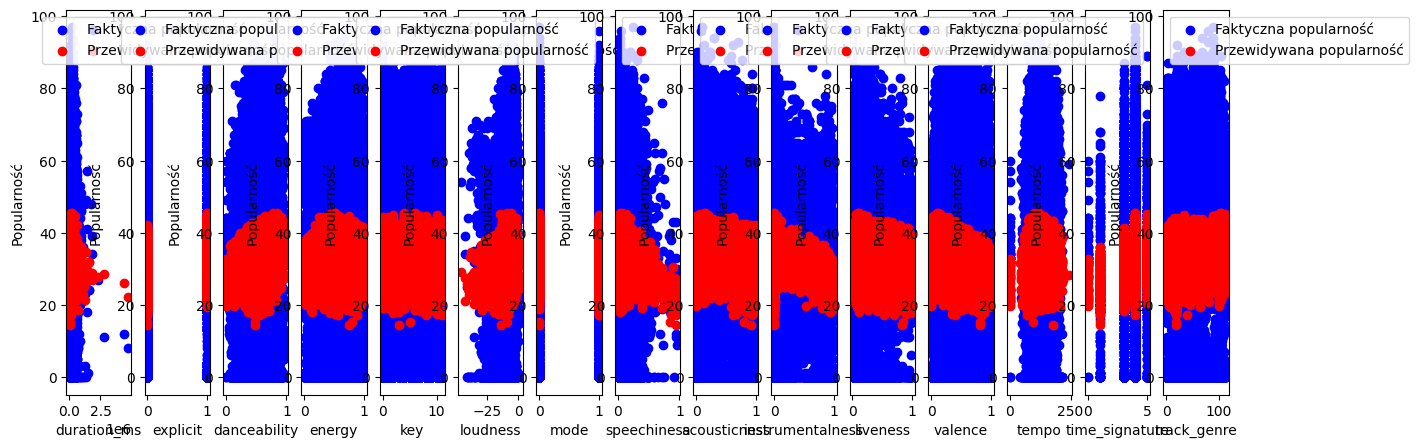

Mean Squared Error: 481.916851585391


In [107]:
# 7.Trenowanie modelu: Przewidywanie popularności piosenki(idealne parametry) sckit-learn
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dataset.csv')

df['track_genre'] = df['track_genre'].astype('category').cat.codes

features = [
  'duration_ms',
  'explicit',
  'danceability',
  'energy',
  'key',
  'loudness',
  'mode',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo',
  'time_signature',
  'track_genre'
]

X = df[features]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

for i, column in enumerate(X.columns):
    axes[i].scatter(X_test[column], y_test, color='blue', label='Faktyczna popularność')
    axes[i].scatter(X_test[column], y_pred, color='red', label='Przewidywana popularność')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Popularność')
    axes[i].legend()


plt.show()

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

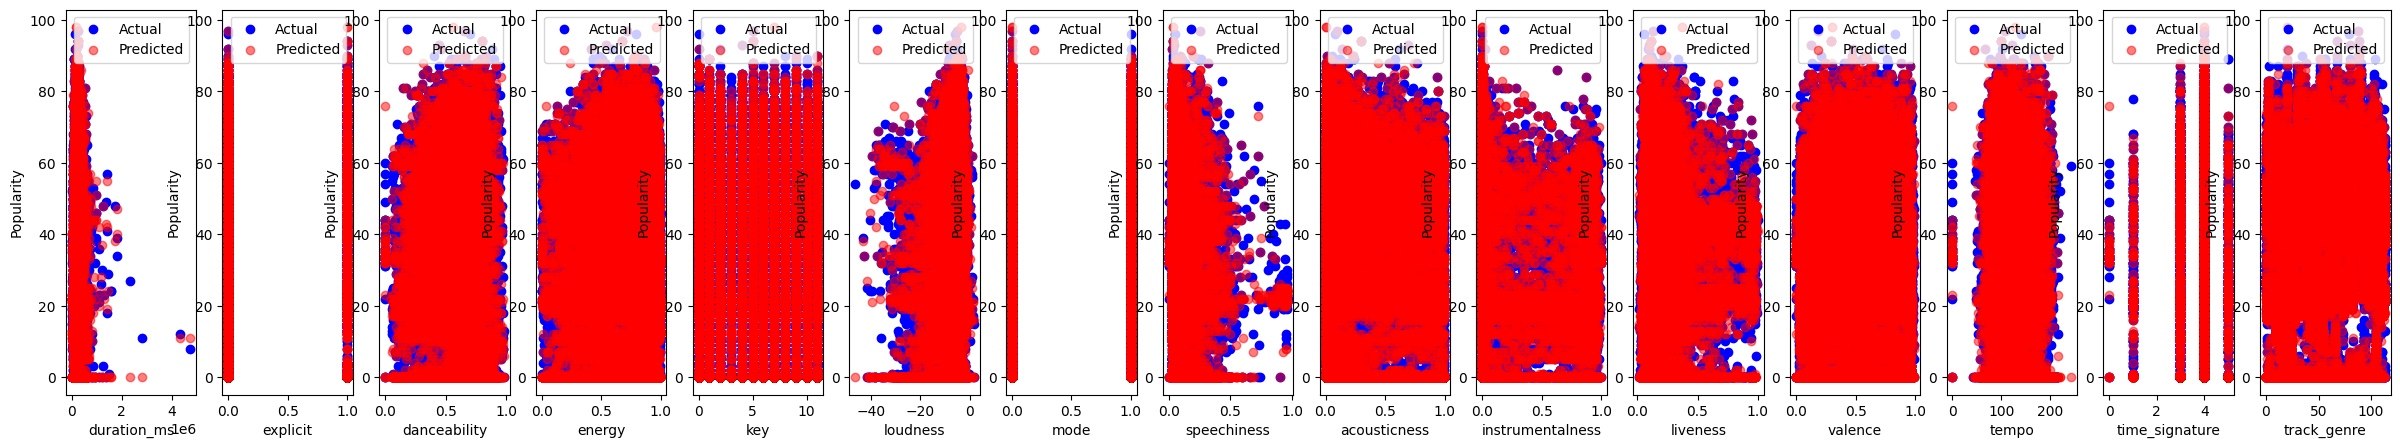

In [117]:
#8.Zastosowanie alternatywnych klasyfikatorów i parametrów (fine tuning)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(30, 5))

for i, column in enumerate(X.columns):
    axes[i].scatter(X_test[column], y_test, color='blue', label='Actual')
    axes[i].scatter(X_test[column], y_pred, alpha=.5, color='red', label='Predicted')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Popularity')
    axes[i].legend()

plt.show()


## **Podsumowanie**
Źródło danych:  [Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

Wykorzystując bazę danych muzyki ze Spotify i dzięki zawartych w nim statystyk pojedynczych utworów zdecydowaliśmy zbadać parametry "idealnej" piosenki.

Analizę danych zaczęliśmy od stworzenia histogramu i wykresu gęstości popularności, który pozwolił nam ustalić stopień rozłożenia popularności utworów. Skorzystaliśmy również z macierzy korelacji, aby określić wzajemne zależności oraz podobieństwa między parametrami piosenek. 

Kolejnym krokiem było ustalenie popularności gatunków oraz wpływ cenzuralności (explicit) na popularność utworu. Z pierwszego wykresu udało się ustalić, że najpopularniejszym gatunkiem jest k-pop. Kolejny pozwolił ustalić, że niecenzuralne utwory mają znaczną przewagę popularności, biorąc pod uwagę ilość danych.

Następnie przeszliśmy do ustalenia najlepszej długości piosenki uwzględniając przedziały co 30 sekund. Ze względu na szerokość posiadanych danych ograniczyliśmy zakres i utwory powyżej 6 minut potraktowaliśmy jako jeden zakres. Otrzymane wyniki nie określiły jednego przeważającego przedziału, można jednak zauważyć że wyniki w przedziale od 4 do 6 minut są niemal identyczne, co daje bardzo szeroki zakres dla "ideału"

Stąd przeszliśmy do analizy autorów utworów. Utworzyliśmy 2 tabele, w zależności od ilości piosenek oraz od średniej popularności utworu, wraz z ich statystykami i najczęściej pojawiającym się gatunkiem w ich twórczości. Po analizie top 25 pozycji z obu tabel widać, że tylko jeden artysta, "Bad Bunny", znalazł się w obu tych zakresach, co pozwala wywnioskować, że ilość ma negatywny wpływ na jakość, a zauważalną przewagę w popularności mają artyści posiadający poniżej 10 utworów.

Za pomocą normalizacji i wektoryzacji tekstu podjęliśmy próbę wygenerowania tytułu "idealnego" dla "idealnego" utworu. Wyniki obu metod nie były identyczne, ale w obu powtórzyło się to samo słowo "vivo". Pozwala to wywnioskować, że powinien być to składnik "idealnego" tytułu.

Do znalezienia idealnych parametrów piosenki wykorzystaliśmy model regresji liniowej, jednak jak widać na wykresach, nie jest to model, który znajduje jakiekolwiek związki pomiędzy parametrami piosenki, a jej popularnością. Większość przewidzianych wartości mieści się na przestrzeni 20-40 punktów popularności, co nie pozwala na wyciągnięcie żadnych wniosków.

Użycie innego klasyfikatora, tym razem lasu losowego, pokazuje już o wiele jaśniejszy wpływ niektórych parametrów na popularność piosenki, i jak widać na wykresach pokrywa się w znacznym stopniu z danymi testowymi. Świadczy to o tym, że model ten jest w stanie z dosyć dobrą dokładnością przewidzieć, jak dany parametr wpłynie na popularność piosenki. Jednocześnie można zauważyć, że niektóre parametry mają większy wpływ na popularność niż inne. Aby poprawnie zinterpretować parametry, należy odnieść się do źródła danych, gdzie są one opisane.

Czytając wykresy po kolei, można zauważyć, że im piosenka krótsza, tym cieszy się większą popularnością. Wulgarność piosenki nie ma aż takiego wpływu na jej popularność, natomiast w małym stopniu piosenki z wulgarnym tekstem są popularniejsze. To, czy piosenka nadaje się do tańca również nie jest bardzo istotne, jednak widać, że dominują piosenki taneczne. Podobnie jest z energią piosenki, piosenki bardziej energiczne zyskują na popularności. Klucz również nie gra znacznej roli, natomiast można zauważyć, że króluje klucz F - basowy. W teorii muzyki klucz basowy służy do zapisu nut dla niskich głosów (basu, barytonu) i instrumentów nisko brzmiących (kontrabasu, gitary basowej, itp.). Można zatem wywnioskować, że popularniejsze piosenki mają niższą tonację. Przy głośności widać jasno, że im głośniejsza piosenka, tym bardziej popularna. W przypadku tonacji przeważają tonacje molowe. Oznacza to, że smutne piosenki są popularniejsze. Wykres ilości mowy nasuwa jasne wnioski - im więcej tekstu/mowy w piosence, tym jest mniej popularna. Gatunki takie jak hip-hop/rap są na gorszej pozycji. W tym względzie zdecydowanie lepiej jest mieć mniej tekstu. Akustyczność piosenki negatywnie wpływa na jej popularność. Stąd wynika, że obecnie bardziej popularne są piosenki zawierające brzmienia elektryczne. Instrumentalność piosenki również ma negatywny wpływ na popularność piosenki - im mniej śpiewu, tym mniej popularna jest piosenka. Jak więc widać śpiew jest bardzo istotny dla przeciętnego słuchacza. Słuchacze preferują też utwory nagrane w studiu, a nie na żywo. Wesołość muzyki nie ma większego wpływu na jej popularność, choć minimalnie wygrywają utwory smutniejsze. Tempo utworu jest za to istotne. Popularniejsze piosenki skłaniają się ku średniej 140 uderzeń na minutę. Warto jednak zauważyć, że znaczna większość utworów ma tempo między 50 a 200 uderzeń na minutę. Najpopularniejsze metrum utworu to 4/4. W końcu, gatunek muzyki również jest dość istotny. Nie widać tego zbyt dobrze na wykresie, ponieważ aby w miarę czytelnie można było zwizualizować dane, należało przypisać każdemu gatunkowi numer. Jednakże wiemy, że gatunki są posortowane alfabetycznie, począwszy od A - 0 do Z - 100. Najpopularniejszy gatunek mieści się w przedziale 75-80, i bardzo łatwo można się domyślić, że jest to gatunek, którego nazwa pochodzi od słowa "popularny", a więc pop.

Zatem idealna piosenka powinna:
- być krótka,
- zawierać wulgaryzmy,
- nadawać się do tańca,
- być energiczna,
- mieć niższą tonację, klucz basowy,
- być głośna,
- mieć tonację molową, czyli mieć smutną melodię,
- mieć mało tekstu,
- zawierać dźwięki elektryczne,
- zawierać dużo śpiewu,
- być nagrana w studiu,
- być smutna,
- mieć tempo około 140 uderzeń na minutę,
- mieć metrum 4/4
- mieć gatunek pop